In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown
import os

# Global settings
plt.rcParams.update({
    "figure.figsize": (3.75, 3.0),
    "font.size": 12,
    "font.family": "serif",
    "axes.grid": False,
    "savefig.dpi": 300,
    "savefig.format": "pdf"
})

In [ ]:
file_id = '1F6b961eijthkGNWuA217IqlzwHM9k_4a'
url = f'https://drive.google.com/uc?id={file_id}'
file_path = 'data.csv'

if not os.path.exists(file_path):
    gdown.download(url, file_path, quiet=False)

df = pd.read_csv(file_path)
data = df[['userId', 'movieId', 'rating', 'timestamp']].to_numpy()

# Sequential Mapping
user_ids, u_inverse = np.unique(data[:, 0], return_inverse=True)
movie_ids, m_inverse = np.unique(data[:, 1], return_inverse=True)

# Sort and Split Indexing
sort_u = np.argsort(u_inverse)
user_index = np.split(data[sort_u][:, [1, 2, 3]], np.unique(u_inverse[sort_u], return_index=True)[1][1:])

sort_m = np.argsort(m_inverse)
movie_index = np.split(data[sort_m][:, [0, 2, 3]], np.unique(m_inverse[sort_m], return_index=True)[1][1:])

print(f"Indexed {len(user_index)} users and {len(movie_index)} movies.")

Indexed 200948 users and 84432 movies.


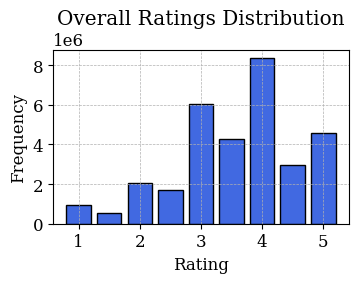

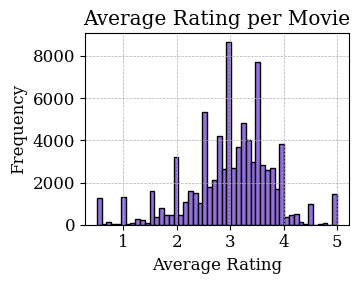

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ----------------------------
# Overall Ratings Distribution
# ----------------------------
plt.figure()
plt.hist(df['rating'], bins=np.arange(0.75, 5.75, 0.5), color='#4169E1', edgecolor='black', rwidth=0.8)
plt.title('Overall Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, ls='--', lw=0.5)
plt.tight_layout()
plt.savefig('overall_ratings.pdf')
plt.show()

# ----------------------------
# Average Rating per Movie
# ----------------------------
avg_movie_ratings = df.groupby('movieId')['rating'].mean()

plt.figure()
plt.hist(avg_movie_ratings, bins=50, color='mediumpurple', edgecolor='black')
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True, ls='--', lw=0.5)
plt.tight_layout()
plt.savefig('avg_movie_ratings.pdf')
plt.show()


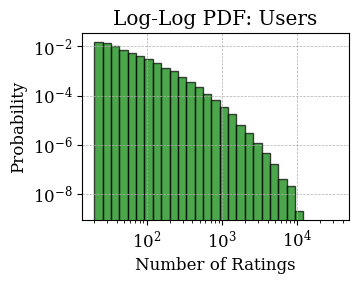

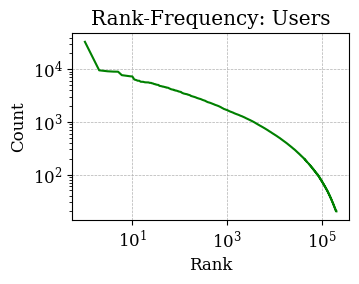

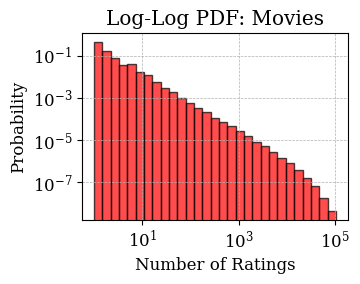

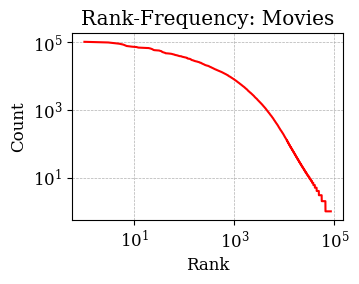

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot log-log PDF and rank-frequency plots
def plot_power_law(counts, title, color):
    file_title = title.lower().replace(" ", "_")

    # 1. Log-Log PDF
    plt.figure()
    bins = np.logspace(np.log10(counts.min()), np.log10(counts.max()), 30)
    plt.hist(counts, bins=bins, density=True, color=color, alpha=0.7, edgecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Log-Log PDF: {title}')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Probability')
    plt.grid(True, ls='--', lw=0.5)
    plt.tight_layout()
    plt.savefig(f'log_log_pdf_{file_title}.pdf', bbox_inches='tight')
    plt.show()

    # 2. Rank-Frequency
    plt.figure()
    sorted_counts = np.sort(counts)[::-1]
    plt.loglog(np.arange(1, len(sorted_counts) + 1), sorted_counts, color=color)
    plt.title(f'Rank-Frequency: {title}')
    plt.xlabel('Rank')
    plt.ylabel('Count')
    plt.grid(True, ls='--', lw=0.5)
    plt.tight_layout()
    plt.savefig(f'rank_freq_{file_title}.pdf', bbox_inches='tight')
    plt.show()

# Prepare count data
user_counts = np.array([len(u) for u in user_index])
movie_counts = np.array([len(m) for m in movie_index])

# Generate and save the plots
plot_power_law(user_counts, "Users", "green")
plot_power_law(movie_counts, "Movies", "red")


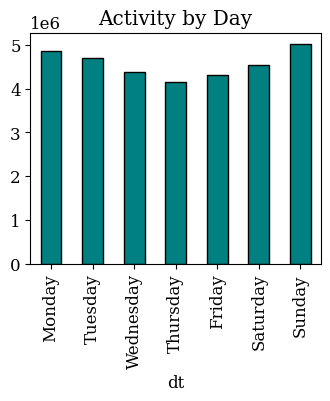

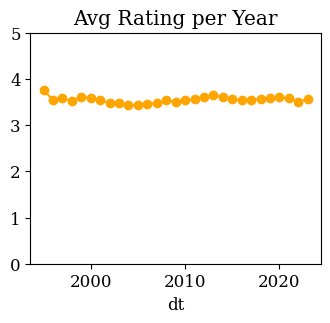

In [ ]:
df['dt'] = pd.to_datetime(df['timestamp'], unit='s')

# Activity by Day of Week
plt.figure()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['dt'].dt.day_name().value_counts().reindex(order).plot(kind='bar', color='teal', edgecolor='black')
plt.title('Activity by Day')
plt.savefig('activity_by_day.pdf', bbox_inches='tight') # Save line
plt.show()

# Evolution of Average Rating over Years
plt.figure()
df.groupby(df['dt'].dt.year)['rating'].mean().plot(marker='o', color='orange')
plt.title('Avg Rating per Year')
plt.ylim(0, 5)
plt.savefig('avg_rating_per_year.pdf', bbox_inches='tight') # Save line
plt.show()

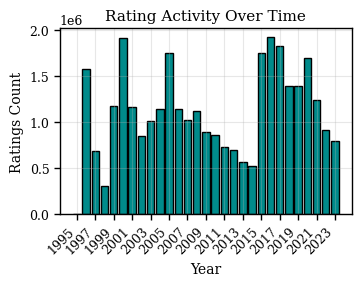

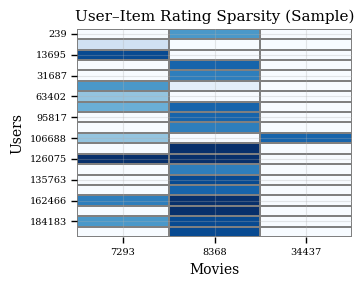

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# -------------------------------
plt.rcParams.update({
    "figure.figsize": (3.75, 3.0),
    "font.size": 11,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "axes.linewidth": 1,
    "xtick.major.width": 1,
    "ytick.major.width": 1,
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "savefig.dpi": 300,
    "savefig.format": "pdf",
    "savefig.bbox": "tight",
    "font.family": "serif"
})

# -------------------------------
# Plot 1: Rating Activity Over Time
# -------------------------------
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
rating_counts_by_year = df['datetime'].dt.to_period("Y").value_counts().sort_index()

years = rating_counts_by_year.index.astype(str)
counts = rating_counts_by_year.values

plt.figure()
plt.bar(years, counts, color='darkcyan', edgecolor='black')

plt.title('Rating Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Ratings Count')

step = 2 if len(years) <= 30 else 5
xtick_positions = list(range(0, len(years), step))
plt.xticks(xtick_positions, [years[i] for i in xtick_positions], rotation=45, ha='right')

plt.subplots_adjust(bottom=0.28)
plt.tight_layout()
plt.savefig("ratings_over_time.pdf")
plt.show()

# -----------------------------------
# Plot 2: User–Item Sparsity Heatmap
# -----------------------------------
sample_users = df['userId'].drop_duplicates().sample(100, random_state=42)
sample_movies = df['movieId'].drop_duplicates().sample(100, random_state=42)

sample_df = df[
    df['userId'].isin(sample_users) &
    df['movieId'].isin(sample_movies)
]

pivot = sample_df.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=0
)

plt.figure(figsize=(3.75, 3.0))
sns.heatmap(
    pivot,
    cmap='Blues',
    cbar=False,
    linewidths=0.1,
    linecolor='gray'
)
plt.title('User–Item Rating Sparsity (Sample)')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.savefig("sparsity_heatmap_sample.pdf")
plt.show()
